In [64]:
import numpy as np
import matplotlib.pyplot as plt

ds=0.1 
x = np.arange(0.01, 1,ds)
s=x
def foil(x):
    return 2.5*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1015*x**4)
y=foil(x)

c=np.zeros((len(x),len(x)))

U=10.0  # Free stream velocity

for i in range(len(x)):
    for j in range(len(x)):
        c[i,j]=ds*y[i]/((x[i]-s[j])**2 + y[i]**2)

k=np.linalg.solve(c,U*y)

def psi(X,Y):
    val = 0.0
    for i in range(len(x)):
        val += k[i]*ds*Y/((X - s[i])**2 + Y**2)
    return U*Y - val

# Mesh for stream function
xm = np.arange(-1, 2, 0.01)
ym = np.arange(0, 1, 0.01)

X, Y = np.meshgrid(xm, ym)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = psi(X[i,j], Y[i,j])

# Mask: keep only points above the airfoil surface y(x)
y_surface = np.interp(X, x, y, left=0.0, right=0.0)  # broadcasted to X shape
mask = Y >= y_surface
Z_masked = np.ma.masked_where(~mask, Z)



<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\nicoa\AppData\Local\Temp\ipykernel_15660\2500050194.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.colorbar(label='$\psi$ (Stream Function)')


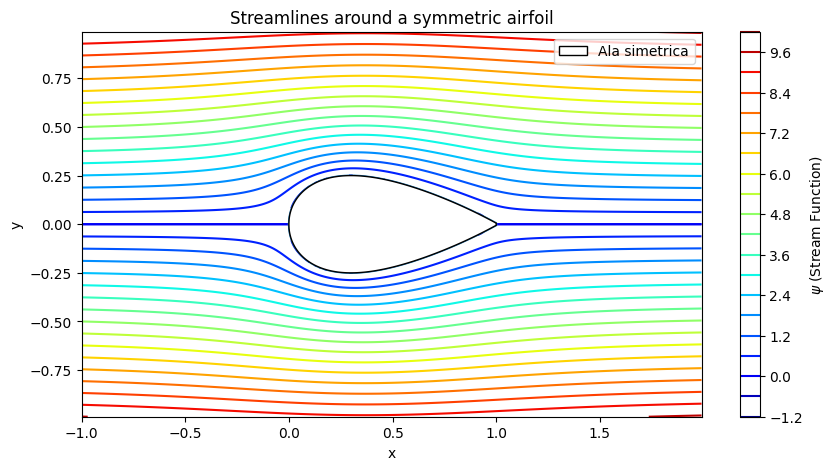

In [83]:
# Plotting the streamlines (only above surface)
xplot=np.linspace(0,1,1000)
xplot_conc=np.concatenate((xplot, xplot[::-1]))
yplot_conc=np.concatenate((foil(xplot), -foil(xplot)[::-1]))

plt.figure(figsize=(10,5))
plt.contour(X, Y, Z_masked,levels=20,cmap='jet')
plt.contour(X, -Y, Z_masked, levels=20, cmap='jet')
plt.colorbar(label='$\psi$ (Stream Function)')
# then draw the polygon (airfoil) on top
plt.fill(xplot_conc, yplot_conc, facecolor='white', edgecolor='k',
         alpha=1, label='Ala simetrica', zorder=10)
plt.plot(xplot_conc, yplot_conc)  # outline on top

plt.title('Streamlines around a symmetric airfoil')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

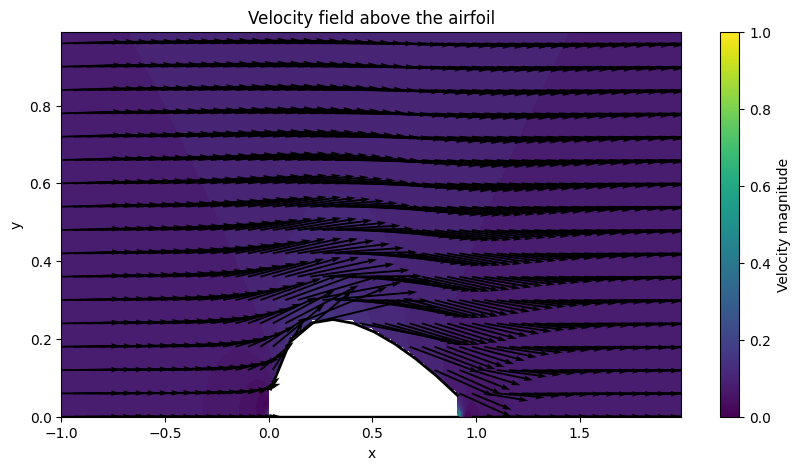

In [66]:
# ...existing code...
# Compute velocity field from stream function (u = dψ/dy, v = -dψ/dx)
dx = xm[1] - xm[0]
dy = ym[1] - ym[0]
dZ_dy, dZ_dx = np.gradient(Z, dy, dx)   # axis0 -> y, axis1 -> x
u_field = dZ_dy
v_field = -dZ_dx

# Mask velocities below the airfoil surface (reuse y_surface / mask computed earlier)
u_masked = np.ma.masked_where(~mask, u_field)
v_masked = np.ma.masked_where(~mask, v_field)
speed = np.sqrt(u_field**2 + v_field**2)
speed_masked = np.ma.masked_where(~mask, speed)

# Plot velocity magnitude + quiver (downsample for clarity)
plt.figure(figsize=(10,5))
plt.contourf(X, Y, speed_masked, levels=60, cmap='viridis')
stride = (slice(None, None, 6), slice(None, None, 6))
plt.quiver(X[stride], Y[stride], u_masked[stride], v_masked[stride], 
           color='k', scale=100, width=0.003, headwidth=3)
plt.plot(x, y, 'k-', linewidth=2)               # upper surface
plt.plot(x, -y, 'k-', linewidth=1, alpha=0.5)   # lower surface (for reference)
plt.colorbar(label='Velocity magnitude')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity field above the airfoil')
plt.xlim(xm.min(), xm.max())
plt.ylim(0, ym.max())
plt.show()
# ...existing code...